## Part A: Theory

### **Q1. Minimax loss in GANs and why it creates competition**

GAN training is formulated as a two-player minimax game between a Generator (G) and a Discriminator (D).  
The objective function is:

$$
\min_G \max_D \; \mathbb{E}_{x \sim p_{data}}[\log D(x)]
+ \mathbb{E}_{z \sim p(z)}[\log(1 - D(G(z)))]
$$

The discriminator tries to maximize this objective by assigning high scores to real images and low scores to generated (fake) images.  
The generator tries to minimize this objective by producing fake images that the discriminator classifies as real.

Because each model continuously improves in response to the other’s weaknesses, this process creates a competitive adversarial learning dynamic.

### **Q2. Mode collapse: what it is, why it happens, and how to mitigate it**

Mode collapse occurs when the generator produces very similar outputs for many different noise inputs, meaning it collapses to only a few modes of the data distribution.  
This happens when the generator discovers a small set of samples that reliably fool the discriminator, causing gradients to stop encouraging output diversity.

Common mitigation techniques include:
- Wasserstein GAN (WGAN / WGAN-GP)
- Mini-batch discrimination
- Feature matching
- Adding noise or label smoothing
- Unrolled GANs
- Balancing generator and discriminator learning rates to prevent an overly strong discriminator


### **Q3. Role of the discriminator in adversarial training**

The discriminator acts as a learned classifier that estimates how “real” an image appears.  
Its primary role is to provide meaningful gradient feedback to the generator. When the discriminator detects unrealistic features, it guides the generator on what needs improvement.

If the discriminator is too weak, the generator learns slowly.  
If the discriminator becomes too strong too quickly, the generator may suffer from vanishing gradients.  
Therefore, the discriminator functions as both a critic and a training signal provider.


### **Q4. How Inception Score (IS) and Fréchet Inception Distance (FID) evaluate GAN performance**

**Inception Score (IS)** uses a pretrained Inception network to evaluate generated images. It rewards:
1. High-quality images that are confidently classifiable  
2. Diversity across different image classes  

A higher IS indicates better performance, but IS does not directly compare generated images with real images.

**Fréchet Inception Distance (FID)** compares the feature distributions of real and generated images in the Inception embedding space, modeling them as Gaussian distributions.  
Lower FID values indicate better image quality and closer similarity to the real data distribution.  
FID is widely preferred because it captures both realism and distribution similarity.


# Part2

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8192)           │       819,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8192)           │        32,768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 256)      │     2,097,152 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 8, 8, 256)      │       589,824 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 16, 16, 128)    │       524,288 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 16, 16, 128)    │       147,456 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 32, 32, 64)     │       131,072 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,346,816 (16.58 MB)

 Trainable params: 4,328,768 (16.51 MB)

 Non-trainable params: 18,048 (70.50 KB)

None


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 662,977 (2.53 MB)

 Trainable params: 662,977 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

None
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Saved: dcgan_cifar10/samples/epoch_0000.png
Epoch 1/50  g_loss=0.9201  d_loss=1.2912  time=34.8s
Epoch 2/50  g_loss=0.6585  d_loss=1.3584  time=26.2s
Epoch 3/50  g_loss=0.7187  d_loss=1.3649  time=26.6s
Epoch 4/50  g_loss=0.7041  d_loss=1.4030  time=26.9s
Epoch 5/50  g_loss=0.6933  d_loss=1.3870  time=27.2s
Epoch 6/50  g_loss=0.6926  d_loss=1.3969  time=27.4s
Epoch 7/50  g_loss=0.7070  d_loss=1.3728  time=27.7s
Epoch 8/50  g_loss=0.6940  d_loss=1.3861  time=27.7s
Epoch 9/50  g_loss=0.7037  d_loss=1.3896  time=27.7s
Epoch 10/50  g_loss=0.6967  d_loss=1.3870  time=27.7s
Saved sample: dcgan_cifar10/samples/epoch_0010.png
Epoch 11/50  g_loss=0.7155  d_loss=1.3725  time=27.7s
Epoch 12/50  g_loss=0.7133  d_loss=1.3659  time=27.7s
Epoch 13/50  g_loss=0.6907  d_loss=1.3951  time=27.8s
Epoch 14/50  g_loss=0.7037  d_loss=1.3718  time=27.8s
Epoch 15/50  g_loss=0.6983  d_loss=1.3826  time=27.8s
Epoch 16/50  g_loss=0.6938  d_loss=1.3843  ti

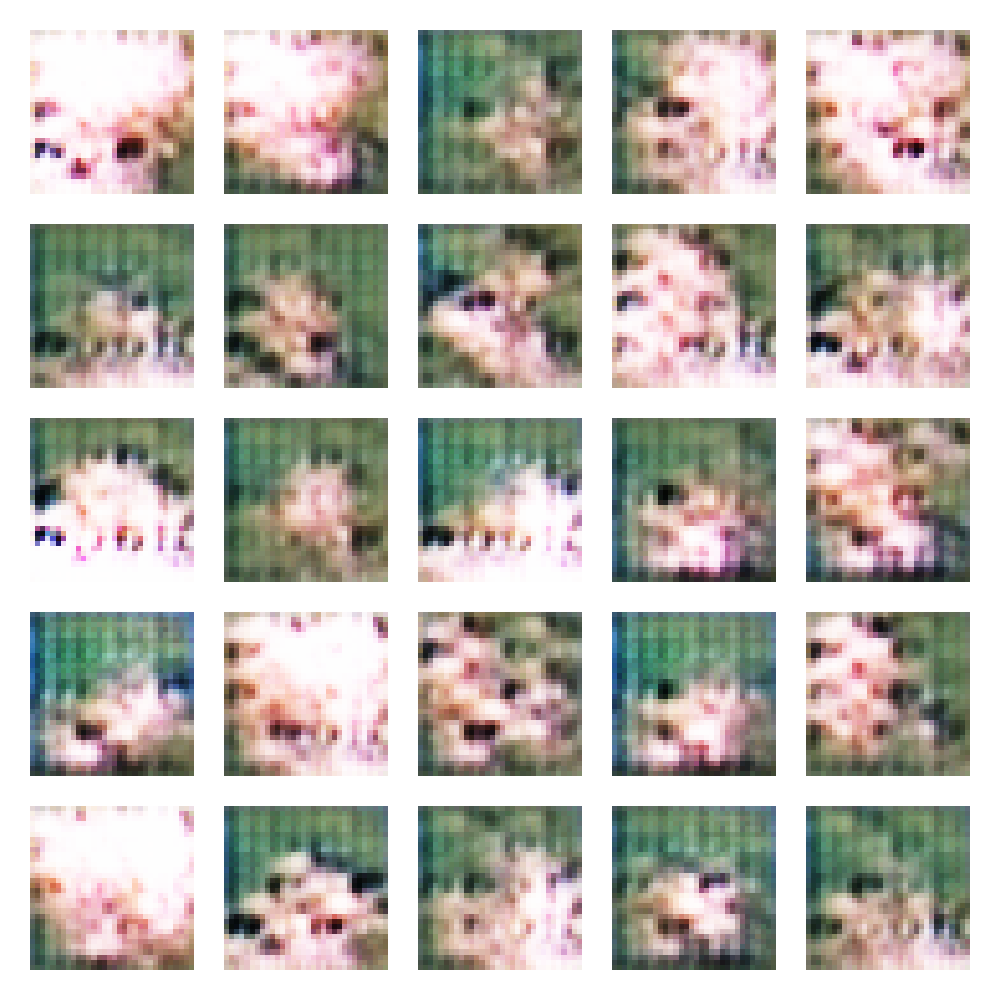

In [1]:
# DCGAN for CIFAR-10 (32x32x3) with:
# 1) Extra Conv2DTranspose layers in the Generator
# 2) Saves generated images every 10 epochs
# Copy-paste into Google Colab and run.

!pip -q install tensorflow matplotlib

import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from pathlib import Path

# -----------------------------
# Reproducibility (optional)
# -----------------------------
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# -----------------------------
# Config
# -----------------------------
BUFFER_SIZE = 50000
BATCH_SIZE = 256
NOISE_DIM = 100
EPOCHS = 50
SAVE_EVERY = 10  # save images every N epochs

# Colab output folders
BASE_DIR = Path("./dcgan_cifar10")
SAMPLES_DIR = BASE_DIR / "samples"
CKPT_DIR = BASE_DIR / "checkpoints"
SAMPLES_DIR.mkdir(parents=True, exist_ok=True)
CKPT_DIR.mkdir(parents=True, exist_ok=True)

NUM_EXAMPLES_TO_GENERATE = 25
fixed_seed = tf.random.normal([NUM_EXAMPLES_TO_GENERATE, NOISE_DIM])

# Optional GPU memory growth (helps some runtimes)
gpus = tf.config.list_physical_devices("GPU")
for gpu in gpus:
    try:
        tf.config.experimental.set_memory_growth(gpu, True)
    except Exception:
        pass

# -----------------------------
# Data: CIFAR-10
# -----------------------------
def load_cifar10_dataset(batch_size=BATCH_SIZE):
    (train_images, _), _ = tf.keras.datasets.cifar10.load_data()
    train_images = train_images.astype("float32")
    # Normalize to [-1, 1] for tanh output
    train_images = (train_images - 127.5) / 127.5

    ds = (tf.data.Dataset.from_tensor_slices(train_images)
          .shuffle(BUFFER_SIZE)
          .batch(batch_size, drop_remainder=True)
          .prefetch(tf.data.AUTOTUNE))
    return ds

# -----------------------------
# Models
# -----------------------------
def make_generator_model(noise_dim=NOISE_DIM):
    """
    Generator: z -> 32x32x3 (tanh)
    Includes EXTRA Conv2DTranspose layers with stride 1 (keeps same spatial size).
    """
    model = tf.keras.Sequential(name="generator")
    model.add(layers.Input(shape=(noise_dim,)))

    # Project and reshape to 4x4x512
    model.add(layers.Dense(4 * 4 * 512, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((4, 4, 512)))

    # 4x4 -> 8x8
    model.add(layers.Conv2DTranspose(256, (4, 4), strides=(2, 2), padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # EXTRA (8x8 -> 8x8)
    model.add(layers.Conv2DTranspose(256, (3, 3), strides=(1, 1), padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # 8x8 -> 16x16
    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # EXTRA (16x16 -> 16x16)
    model.add(layers.Conv2DTranspose(128, (3, 3), strides=(1, 1), padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # 16x16 -> 32x32
    model.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Output: 32x32x3
    model.add(layers.Conv2DTranspose(3, (3, 3), strides=(1, 1), padding="same",
                                     use_bias=False, activation="tanh"))
    return model

def make_discriminator_model():
    """
    Discriminator: 32x32x3 -> logit
    """
    model = tf.keras.Sequential(name="discriminator")
    model.add(layers.Input(shape=(32, 32, 3)))

    model.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, (4, 4), strides=(2, 2), padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))  # logit
    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

print(generator.summary())
print(discriminator.summary())

# -----------------------------
# Losses & Optimizers
# -----------------------------
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_logits, fake_logits):
    real_loss = cross_entropy(tf.ones_like(real_logits), real_logits)
    fake_loss = cross_entropy(tf.zeros_like(fake_logits), fake_logits)
    return real_loss + fake_loss

def generator_loss(fake_logits):
    return cross_entropy(tf.ones_like(fake_logits), fake_logits)

generator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)

# -----------------------------
# Checkpoints
# -----------------------------
checkpoint = tf.train.Checkpoint(
    generator_optimizer=generator_optimizer,
    discriminator_optimizer=discriminator_optimizer,
    generator=generator,
    discriminator=discriminator
)
ckpt_manager = tf.train.CheckpointManager(checkpoint, CKPT_DIR.as_posix(), max_to_keep=5)

# -----------------------------
# Image saving
# -----------------------------
def denorm_to_uint8(img_batch):
    img = (img_batch + 1.0) * 127.5
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

def save_image_grid(images, path, grid_size=5):
    images = denorm_to_uint8(images)
    fig = plt.figure(figsize=(grid_size, grid_size))
    for i in range(grid_size * grid_size):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.tight_layout()
    fig.savefig(path, dpi=200)
    plt.close(fig)

def generate_and_save_images(epoch):
    preds = generator(fixed_seed, training=False).numpy()
    out_path = SAMPLES_DIR / f"epoch_{epoch:04d}.png"
    save_image_grid(preds, out_path.as_posix())
    return out_path

# -----------------------------
# Train step
# -----------------------------
@tf.function
def train_step(real_images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        fake_images = generator(noise, training=True)

        real_logits = discriminator(real_images, training=True)
        fake_logits = discriminator(fake_images, training=True)

        g_loss = generator_loss(fake_logits)
        d_loss = discriminator_loss(real_logits, fake_logits)

    g_grads = gen_tape.gradient(g_loss, generator.trainable_variables)
    d_grads = disc_tape.gradient(d_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(g_grads, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(d_grads, discriminator.trainable_variables))

    return g_loss, d_loss

def train(dataset, epochs=EPOCHS):
    # Save initial sample
    p = generate_and_save_images(0)
    print("Saved:", p)

    for epoch in range(1, epochs + 1):
        start = time.time()
        g_losses, d_losses = [], []

        for real_batch in dataset:
            g_loss, d_loss = train_step(real_batch)
            g_losses.append(g_loss)
            d_losses.append(d_loss)

        g_mean = float(tf.reduce_mean(g_losses))
        d_mean = float(tf.reduce_mean(d_losses))
        print(f"Epoch {epoch}/{epochs}  g_loss={g_mean:.4f}  d_loss={d_mean:.4f}  time={time.time()-start:.1f}s")

        if epoch % SAVE_EVERY == 0:
            p = generate_and_save_images(epoch)
            ckpt_manager.save(checkpoint_number=epoch)
            print("Saved sample:", p)

    # final
    p = generate_and_save_images(epochs)
    ckpt_manager.save(checkpoint_number=epochs)
    print("Final sample saved:", p)
    print("All samples in:", SAMPLES_DIR)

# -----------------------------
# Run training
# -----------------------------
dataset = load_cifar10_dataset()
train(dataset, epochs=EPOCHS)

# Show the last saved image grid inside Colab
from IPython.display import Image, display
display(Image(filename=(SAMPLES_DIR / f"epoch_{EPOCHS:04d}.png").as_posix()))
